# MIND: Microsoft News Recommendation

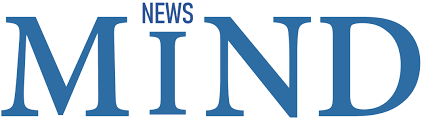

**MIcrosoft News Dataset (MIND)** is a large-scale dataset for news recommendation research. It was collected from anonymized behavior logs of Microsoft News website. The mission of MIND is to serve as a benchmark dataset for news recommendation and facilitate the research in news recommendation and recommender systems area.

MIND contains about **160k English news** articles and **more than 15 million impression logs** generated by **1 million users**. Every news article contains rich textual content including title, abstract, body, category and entities. Each impression log contains the click events, non-clicked events and historical news click behaviors of this user before this impression

# Content Of The File :
1. <a href='#1'> Importing The Packages </a>
2. <a href='#2'> Importing The Data </a>
3. <a href='#3'>Having a look at the data</a>
4. <a href='#4'>Selecting Columns</a>
5. <a href='#5'>Visualizing The data</a>  <ol>
    <li> <a href='#5.1'>Category and Subcategory distribution in the data</a></li>
    <li> <a href='#5.2'>WordClouds For Sports</a></li>
    <li> <a href='#5.3'>Wordcloud For News</a></li>
    <li> <a href='#5.4'>Title Length Distribution per Category</a></li></ol>

6. <a href='#6'>Data Preprocessing</a> <ol>
    <li> <a href='#6.1'>Checking and removing all the duplicate values</a></li>
    <li> <a href='#6.2'>Checking for NaN values</a></li>
    <li> <a href='#6.3'>Getting Titles with more than 4 words</a></li></ol>
7. <a href='#7'>Text Preprocessing </a>
8. <a href='#8'> Bagging Method </a>
9. <a href='#9'>TF-IDF Method</a>
10. <a href='#10'>Category Recommendation System</a><ol>
    <li> <a href='#10.1'>Using SVD and Decision Tree</a></li>
    <li> <a href='#10.2'>Using SVD and XGBClassifier</a></li>
    <li> <a href='#10.3'>Using SVD and LGBMClassifier</a></li>
    </ol>
11. <a href='#11'>Using Text Explainer On The Best Model </a>
12. <a href='#12'>Using Text Explainer in character mode </a>
13. <a href='#13'>Influence of words on predicting categories  </a>

# Update :
<a href='#the_destination'>Debugging the recommendation model</a>
Over here we are trying to debug the genre recommendation model to find the best model :)

<a href='#13'>Influence of words on predicting categories  </a> 
Here we are trying to see the influence of words on prediction of categories and also tells us the weight of those words which is pretty helpfull in recommendation

<a id='1'></a>
# Importing The Packages

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline, make_pipeline
# Below libraries are for feature representation using sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Below libraries are for similarity matrices using sklearn
from sklearn.metrics.pairwise import cosine_similarity  
from lightgbm import LGBMClassifier
from sklearn.metrics import pairwise_distances
import copy
from IPython.display import clear_output
import warnings
# from eli5.lime.samplers import MaskingTextSampler
from re import sub
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
plotly.offline.init_notebook_mode (connected = True)
# import eli5
from sklearn import metrics
from sklearn.model_selection import train_test_split
from PIL import Image 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
import random
import kaleido
warnings.filterwarnings("ignore")

<a id='2'></a>
# Importing the data

In [2]:
data=pd.read_csv('/Users/manel/Documents/CWI/implementations/eda/data/mind-news-dataset/news.tsv')#,header=None,sep='\t')
data.head ()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [3]:
# data.columns=['News ID',
# "Category",
# "SubCategory",
# "Title",
# "Abstract",
# "URL",
# "Title Entities",
# "Abstract Entities "]

<a id='3'></a>
# Having a look at the data

<a id='4'></a>
# Selecting the needed columns

In [4]:
data=data.iloc[:,:5]
data.head()

,News ID,Category,SubCategory,Title,Abstract
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re..."


<a id='5'></a>
# Visualizing The Data

<a id='5.1'></a>
# Category and Subcategory distribution in data

In [5]:
c=data[['Category','SubCategory']].value_counts()


In [6]:
index=[]
for i in c.index:
    index.append(np.array(i))
index=np.array(index)

In [7]:
df=pd.DataFrame(columns=['Category','Sub Category','Values'])
df['Category']=index[:,0]
df['Sub Category']=index[:,1]
df['Values']=c.values

In [8]:
px.bar(data_frame=df,x='Category',y='Values',color='Sub Category')
# fig.write_image ("figures/Categories_hist.png")
# import matplotlib.pyplot as plt
# # set width of bar
# barWidth = 0.25
# fig = plt.subplots(figsize =(12, 8))
# plt.bar(df['Category'],df['Values'], color ='b', width = barWidth, edgecolor ='grey')
 
# # Adding Xticks
# plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
# plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
# # plt.xticks([r + barWidth for r in range(len(IT))],
#         # ['2015', '2016', '2017', '2018', '2019'])
 
# plt.legend()
# plt.show()

### From this we can clearly see that the most of the news was on the Category of news with subcategory newsus followed by sports with football news

<a id='5.2'></a>
# WordCloud For Sports News

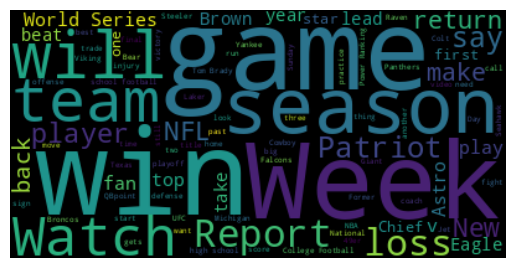

In [9]:
text=' '
for i in data[data['Category']=='sports']['Title']:
    text+=i+' '
    
# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()


<a id='5.3'></a>
# Wordcloud for news

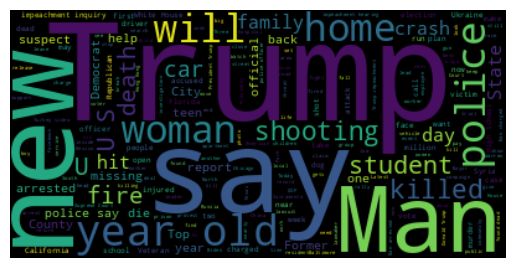

In [10]:
text=' '
for i in data[data['Category']=='news']['Title']:
    text+=i+' '
    
# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()


Wow the main attraction of news has been Trump :)

<a id='5.4'></a>
# Histogram For Title Length

In [62]:
t=[]
for i in data['Title']:
    t.append(len(i))
px.histogram(t,color=data['Category'])

Well most of the titles are in the range of 50 to 100 words :) So if you are gonna write a news article keep the title in 50 - 100 words :)

<a id='6'></a>
# Data Preprocessing

<a id='6.1'></a>
## Checking and removing all the duplicate values

In [63]:
duplicate = data[data.duplicated('Title')]
 
print("Duplicate Rows :")
duplicate.Title#[51176]

Duplicate Rows :


202      Adrian Peterson had to 'hold back tears' in re...
1527     Blazers coach Terry Stotts backs Daryl Morey o...
1554                                   Trailer - Bombshell
1755                                     Photos of the Day
2023     Theo Epstein reacts to Joe Maddon's 'dream' of...
                               ...                        
51176    100-year-old veteran's family learns of Norman...
51197    VA, DC Good News: Nats Fans Engaged, Safest Ci...
51219        Sunday Real Estate: 3 Luxurious Florida Homes
51268    Still teaching at 95, Jimmy Carter draws devot...
51269    Still teaching at 95, Jimmy Carter draws devot...
Name: Title, Length: 848, dtype: object

In [64]:
print('the number of articles before processing :',len(data))
data.drop_duplicates(subset=['Title'],inplace=True)
print('The number of articles after processing :',len(data))

the number of articles before processing : 51282
The number of articles after processing : 50434


<a id='6.2'></a>
## Checking for NaN values

In [65]:
data.isna().sum()

News ID           0
Category          0
SubCategory       0
Title             0
Abstract       2646
dtype: int64

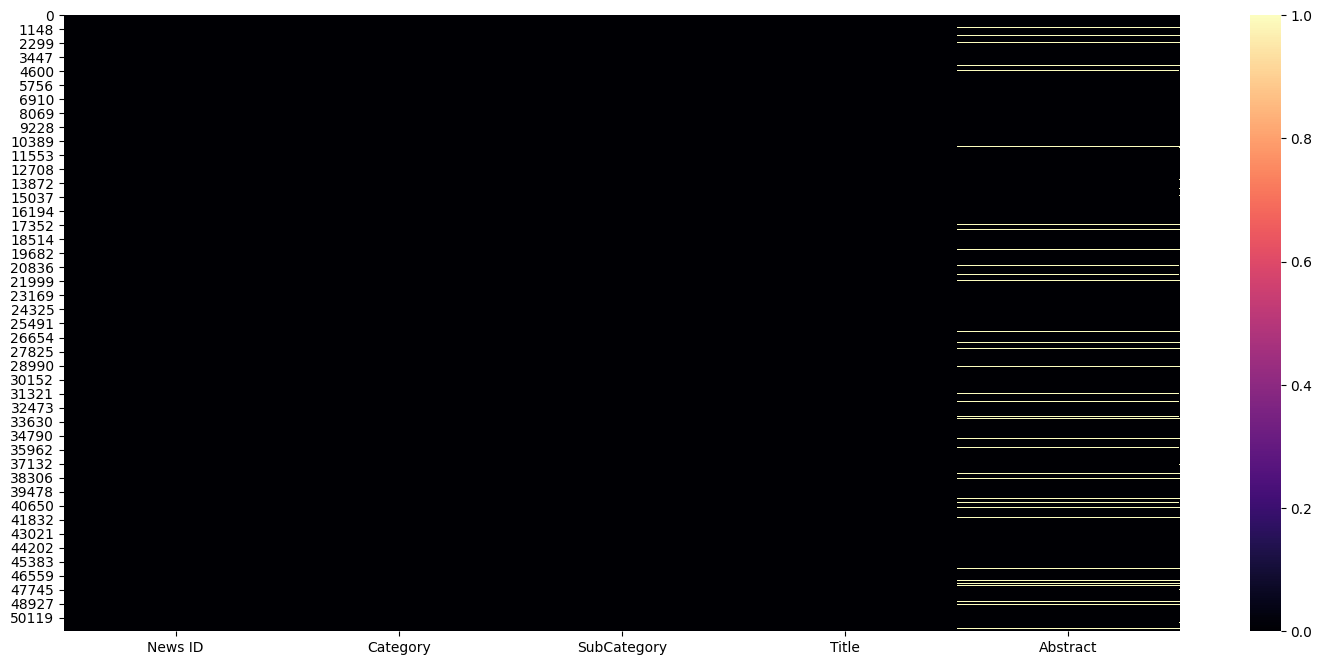

In [66]:
plt.figure(figsize=(18,8))
sns.heatmap(data.isnull(), cbar=True, cmap='magma')


In [67]:
data.dropna(inplace=True)

<a id='6.3'></a>
## Getting Titles with more than 4 words

In [103]:
print('the number of articles before processing :',len(data))
data=data[data['Title'].apply((lambda x: len(x.split())>=4))]
print('The number of articles after processing :',len(data))

the number of articles before processing : 47661
The number of articles after processing : 47547


In [104]:
df2=data.copy()

<a id='7'></a>
# Text Preprocessing

In [70]:
# This function is to remove stopwords from a particular column and to tokenize it
def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen
        stop_words = set(stopwords.words('english')) 
        word_tokens = word_tokenize(example_sent) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        filtered_sentence = [] 
        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 
        return filtered_sentence
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x
    # return data [name]

In [71]:
# Making a function to lemmatize all the words
from nltk.stem import PorterStemmer, WordNetLemmatizer

lemmatizer = WordNetLemmatizer() 
def lemmatize_all(data,name):
    arr=data[name]
    a=[]
    for i in arr:
        b=[]
        for j in i:
            x=lemmatizer.lemmatize(j,pos='a')
            x=lemmatizer.lemmatize(x)
            b.append(x)
        a.append(b)
    data[name]=a

In [72]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()


In [105]:
# Removing Stop words from Title Column

rem_stopwords_tokenize(data,'Title')

In [106]:
# Lemmatizing the Title column
lemmatize_all(data,'Title')

In [107]:
# Making a copy of data to use in the future
data4=data.copy()
data4

,News ID,Category,SubCategory,Title,Abstract
0,N55528,lifestyle,lifestyleroyals,"[The, Brands, Queen, Elizabeth, ,, Prince, Cha...","Shop the notebooks, jackets, and more that the..."
1,N19639,health,weightloss,"[50, Worst, Habits, For, Belly, Fat]",These seemingly harmless habits are holding yo...
2,N61837,news,newsworld,"[The, Cost, Trump, 's, Aid, Freeze, Trenches, ...",Lt. Ivan Molchanets peeked over a parapet of s...
3,N53526,health,voices,"[I, Was, An, NBA, Wife, ., Here, 's, How, It, ...","I felt like I was a fraud, and being an NBA wi..."
4,N38324,health,medical,"[How, Get, Rid, Skin, Tags, ,, According, Derm...","They seem harmless, but there's a very good re..."
...,...,...,...,...,...
51275,N17258,news,newsscienceandtechnology,"[Realme, take, chunk, India, mobile, market, S...",Over 400 percent more phones shipped year-on-year
51276,N23858,sports,golf,"[Young, Northeast, Florida, fan, flock, U.S., ...",When the U.S. women's national soccer team arr...
51277,N16909,weather,weathertopstories,"[Adapting, ,, Learning, And, Soul, Searching, ...",Woolsey Fire Anniversary: A community is forev...
51279,N7482,sports,more_sports,"[St., Dominic, soccer, player, try, kick, canc...","Sometimes, what happens on the sidelines can b..."


## Converting Back To String

In [108]:
def convert_to_string(data,name):
    t=data[name].values
    p=[]
    for i in t:
        listToStr = ' '.join(map(str, i))
        p.append(listToStr)
    data[name]=p


In [109]:
convert_to_string(data,'Title')

## Converting the text

In [110]:
headline_vectorizer = CountVectorizer()

<a id='8'></a>
# Bagging Method 

In [112]:
data

,News ID,Category,SubCategory,Title,Abstract
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth , Prince Charles , ...","Shop the notebooks, jackets, and more that the..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
2,N61837,news,newsworld,The Cost Trump 's Aid Freeze Trenches Ukraine ...,Lt. Ivan Molchanets peeked over a parapet of s...
3,N53526,health,voices,I Was An NBA Wife . Here 's How It Affected My...,"I felt like I was a fraud, and being an NBA wi..."
4,N38324,health,medical,"How Get Rid Skin Tags , According Dermatologist","They seem harmless, but there's a very good re..."
...,...,...,...,...,...
51275,N17258,news,newsscienceandtechnology,Realme take chunk India mobile market Samsung ...,Over 400 percent more phones shipped year-on-year
51276,N23858,sports,golf,Young Northeast Florida fan flock U.S. woman '...,When the U.S. women's national soccer team arr...
51277,N16909,weather,weathertopstories,"Adapting , Learning And Soul Searching : Refle...",Woolsey Fire Anniversary: A community is forev...
51279,N7482,sports,more_sports,St. Dominic soccer player try kick cancer curb,"Sometimes, what happens on the sidelines can b..."


In [113]:
def Euclidean_Distance_based_model(row_index, num_similar_items):
    cate=data['Category'][row_index]
    name=data['Title'][row_index]
    cate_data=data[data['Category']==cate]
 
    row_index2=cate_data[cate_data['Title']==name].index
    headline_features   = headline_vectorizer.fit_transform(cate_data['Title'].values)
    couple_dist = pairwise_distances(headline_features,headline_features[row_index2])
    indices = np.argsort(couple_dist.ravel())[0:num_similar_items]
    df = pd.DataFrame({'headline':df2[df2['Category']==cate]['Title'].values[indices],
                       'Category':cate_data['Category'].values[indices],
                       'Abstract':cate_data['Abstract'].values[indices],
                'Euclidean similarity with the queried article': couple_dist[indices].ravel()})
    print("="*30,"News Article Name","="*30)
    print('News Headline : ',data['Title'][indices[0]])
    print("\n","="*30,"Recommended News : ","="*30)
    return df.iloc[1:,:]
name=input('News Title For Recommendation :')
clear_output()
ind=df2[df2['Title']==name].index[0]
dd=Euclidean_Distance_based_model(ind, 100)
dd.head(10)

============================== News Article Name ==============================
News Headline :  50 Worst Habits For Belly Fat

 ============================== Recommended News :  ==============================


,headline,Category,Abstract,Euclidean similarity with the queried article
1,How deal health worry,health,One of the most stressful things in our modern...,3.316625
2,Health Benefits Nutritional Yeast How Use It,health,"Vegans love the cheesy, umami flavor and there...",3.464102
3,Health problem treated acupuncture,health,The health benefits of acupuncture are backed ...,3.605551
4,How Easy Is It Get Pneumonia ?,health,Celebs such as Oprah Winfrey and Whoopi Goldbe...,3.605551
5,Health Watch - Low Libido,health,Health Watch - Low Libido.,3.605551
6,When I Had Choose Between My Health How I Worship,health,I never thought my chronic illness would force...,3.605551
7,I Have Anxiety Here 's How It Actually Helps Me,health,I was diagnosed with panic disorder 20 years a...,3.605551
8,How Can I Tell My Teen Is Bully ?,health,No parent wants to even consider that their ch...,3.741657
9,'Souping ' : Should try ?,health,Regularly eating soup is comforting and fillin...,3.741657
10,How Long Is Cold Contagious ?,health,"Please, please, please work from home.",3.741657


I think we got some good recommendations here  :)

The thing about using this model is that it gives real less importance to less frequent words but sometimes those are the words that could make some real difference .

<a id='9'></a>
# Using TF-IDF Method

In [114]:
tfidf_headline_vectorizer = TfidfVectorizer(min_df = 0)

In [115]:
def TFIDF_based_model(row_index, num_similar_items):
    cate=data['Category'][row_index]
    name=data['Title'][row_index]
    cate_data=data[data['Category']==cate]
 
    row_index2=cate_data[cate_data['Title']==name].index
    headline_features   = tfidf_headline_vectorizer.fit_transform(cate_data['Title'].values)
    couple_dist = pairwise_distances(headline_features,headline_features[row_index2])
    indices = np.argsort(couple_dist.ravel())[0:num_similar_items]
    df = pd.DataFrame({'headline':df2[df2['Category']==cate]['Title'].values[indices],
                       'Category':cate_data['Category'].values[indices],
                       'Abstract':cate_data['Abstract'].values[indices],
                'Euclidean Distance Similarity': couple_dist[indices].ravel()})
    print("="*30,"News Article Name","="*30)
    print('News Headline : ',data['Title'][indices[0]])
    print("\n","="*26,"Recommended News Using TFIDf: ","="*30)
    return df.iloc[1:,:]
name=input('News Title For Recommendation :')
clear_output()
ind=df2[df2['Title']==name].index[0]
dd=TFIDF_based_model(ind, 100)
dd.head(10)

============================== News Article Name ==============================
News Headline :  50 Worst Habits For Belly Fat

 ========================== Recommended News Using TFIDf:  ==============================


,headline,Category,Abstract,Euclidean Distance Similarity
1,"I Had 1 Cheat Day Once Week For 2 Months , Thi...",health,Some experts and dieters agree that cheat meal...,1.204548
2,'How I Told My Kids About My Breast Cancer ',health,I was scared that they would be scared. I was ...,1.253935
3,Pippa Middleton Takes Baby Son Cranial Osteopa...,health,"Soon after Arthur was born last year, I heard ...",1.265490
4,How Listening My Gut New Symptom Saved My Life,health,A woman with chronic illness describes what ha...,1.274437
5,I Was 24 & Had Just Scored My Dream Job In Fas...,health,One in four adults in the U.S. are living with...,1.278015
6,How Ensure Your Mental Health Remains Priority...,health,"It's commonly referred to as ""the most wonderf...",1.280163
7,When I Had Choose Between My Health How I Worship,health,I never thought my chronic illness would force...,1.283807
8,How To Reach Out If Your Friend Is Struggling ...,health,Reaching out to check in on someone who strugg...,1.284680
9,"My Doctors Told Me I Had IBS . 4 Years Later ,...",health,"One in three women has this disorder, and it o...",1.285359
10,I Have Anxiety Here 's How It Actually Helps Me,health,I was diagnosed with panic disorder 20 years a...,1.288338


WEll the recommendations are different and looks better :) 

Let's see if we can make it much better :)

### Why TFIDF is good ??

* It’s fast and works well when documents are large and/or have lots of overlap.
* It looks for exact matches, so at the very least you should use a lemmatizer to take care of the plurals.
* When comparing short documents with limited-term variety — such as search queries — there is a risk that you will miss semantic relationships where there isn’t an exact word match.

<a id='10'></a>
# Let's Make A Category Recommendation System Too

In [38]:
X=data['Title'].values
y=data['Category'].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [39]:
X

array(['The Brands Queen Elizabeth , Prince Charles , Prince Philip Swear By',
       '50 Worst Habits For Belly Fat',
       "The Cost Trump 's Aid Freeze Trenches Ukraine 's War", ...,
       'Adapting , Learning And Soul Searching : Reflecting On Woolsey Fire',
       'St. Dominic soccer player try kick cancer curb',
       'How Sounders MLS Cup'], dtype=object)

<a id='the_destination'></a>
# Debugging the Recommendation model 


In [47]:
def print_report(pipe):
    y_pred = pipe.predict(X_test)
    p=np.unique(y_test)
    report = metrics.classification_report(y_test, y_pred,
        target_names=p)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))



<a id='10.1'></a>
# Truncated SVD and Decision Tree Classifier

In [48]:
vec = TfidfVectorizer(min_df=4)
svd = TruncatedSVD(n_components=400, n_iter=8, random_state=42)
lsa = make_pipeline(vec, svd)
ds=DecisionTreeClassifier()
pipe = make_pipeline(lsa, ds)

In [49]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.42947059234911533

In [50]:
# Making report for decision tree classifier
print_report(pipe)

               precision    recall  f1-score   support

        autos       0.15      0.15      0.15       445
entertainment       0.12      0.10      0.11       176
      finance       0.17      0.18      0.17       887
 foodanddrink       0.27      0.27      0.27       779
       health       0.19      0.20      0.20       547
         kids       0.00      0.00      0.00         3
    lifestyle       0.18      0.17      0.18       682
   middleeast       0.00      0.00      0.00         1
       movies       0.07      0.08      0.08       177
        music       0.06      0.07      0.07       227
         news       0.56      0.56      0.56      4478
 northamerica       0.00      0.00      0.00         1
       sports       0.70      0.69      0.70      3849
       travel       0.10      0.11      0.11       667
           tv       0.06      0.06      0.06       266
        video       0.11      0.12      0.12       601
      weather       0.28      0.26      0.27       513

     acc

<a id='10.2'></a>
# Pipeline using TruncatedSVD and XGBClassifier

In [51]:
vec = TfidfVectorizer(min_df=0)
svd = TruncatedSVD(n_components=10, n_iter=1, random_state=42)
lsa = make_pipeline(vec, svd)
xgb=XGBClassifier()
pipe = make_pipeline(lsa, xgb)

In [52]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.4820616826351493

In [53]:
# Making report for pipeline using XGBClassifier
print_report(pipe)

               precision    recall  f1-score   support

        autos       0.25      0.05      0.09       445
entertainment       0.23      0.02      0.03       176
      finance       0.17      0.03      0.05       887
 foodanddrink       0.28      0.31      0.29       779
       health       0.26      0.09      0.13       547
         kids       0.00      0.00      0.00         3
    lifestyle       0.19      0.06      0.09       682
   middleeast       0.00      0.00      0.00         1
       movies       0.00      0.00      0.00       177
        music       0.33      0.00      0.01       227
         news       0.48      0.80      0.60      4478
 northamerica       0.00      0.00      0.00         1
       sports       0.55      0.73      0.63      3849
       travel       0.18      0.03      0.04       667
           tv       0.00      0.00      0.00       266
        video       0.20      0.01      0.01       601
      weather       0.61      0.18      0.27       513

     acc

<a id='10.3'></a>
# Pipeline using TruncatedSVD and LGBMClassifier

In [ ]:
vec = TfidfVectorizer(min_df=0)
svd = TruncatedSVD(n_components=100, n_iter=1, random_state=42)
lsa = make_pipeline(vec, svd)
lgm=LGBMClassifier()
pipe2 = make_pipeline(lsa, lgm)

In [ ]:
pipe2.fit(X_train, y_train)
pipe2.score(X_test, y_test)

In [ ]:
# Making report for pipeline using LGBMClassifier
print_report(pipe2)

In [ ]:
p=np.unique(y_test)

def print_prediction(doc):
    y_pred = pipe2.predict_proba([doc])[0]
    for target, prob in zip(p, y_pred):
        print("{:.3f} {}".format(prob, target))

doc = data['Title'][0]
print_prediction(doc)

# LGBMClassifier worked the best amongst all 3 it gave 48% accuracy

<a id='11'></a>
# Let's have a look at the text explainer 

In [57]:
from eli5.lime import TextExplainer

te = TextExplainer(random_state=42)
te.fit(doc, pipe2.predict_proba)
te.show_prediction(target_names=list(p))

AttributeError: module 'jinja2.ext' has no attribute 'with_'

: 

## Explanation makes sense - we expect reasonable classifier to take highlighted words in account. 

## A custom sampler instance can be passed to TextExplainer if we want to experiment with sampling.

<a id='12'></a>
# Text Explainer with char analyzer

In [ ]:
vec = TfidfVectorizer(min_df=0, analyzer='char',
                      ngram_range=(3,6))
svd = TruncatedSVD(n_components=100, n_iter=1, random_state=42)
lsa = make_pipeline(vec, svd)
lgm=LGBMClassifier()
pipe3 = make_pipeline(lsa, lgm)

In [ ]:
pipe3.fit(X_train, y_train)
pipe3.score(X_test, y_test)

In [ ]:
# Making report for decision tree classifier
print_report(pipe3)

In [ ]:
sampler = MaskingTextSampler(

    token_pattern='.',

    max_replace=3,

    # by default all tokens are replaced;
    # replace only a token at a given position.
    bow=False,
)
samples, similarity = sampler.sample_near(doc)
print(samples[0])


In [ ]:
te = TextExplainer(char_based=True, sampler=sampler, random_state=42)
te.fit(doc, pipe3.predict_proba)
te.show_prediction()

In [ ]:
print(te.metrics_)


This is text explainer which tries to explain the text and their classes :)

<a id='13'></a>
# Let's See The Influence Of Words On Deciding categories

In [ ]:
all_title=''
for i in data['Title'].values:
    all_title+=i+' '
# Let's select 40 random words from this 
x=[]
for i in range(30):
    x.append(random.choice(all_title.split(' ')))

In [ ]:
# Getting probablities of being a class
probs=pipe3.predict_proba(x)

In [ ]:
# Getting labels of the words
labels=pipe3.predict(x)

In [ ]:
svd = TruncatedSVD(n_components=3, n_iter=4, random_state=42)

In [ ]:
transformed=svd.fit_transform(probs)

In [ ]:
px.scatter_3d(x=transformed[:,0],y=transformed[:,1],color=labels,z=transformed[:,2],text=x)

# Wow That graph shows the words as a vector and helps us understand which word is highly important in selecting the category
## For eg. words chunk and withdraw are close which means they might have a mixed prob which is not near 1 so they are close to each other but words like billion which are farthest away shows high weightage towards their class finance :)

# Behavior data

In [31]:
# The behaviors.tsv file contains the impression logs and users' news click histories. 
# It has 5 columns divided by the tab symbol:
# - Impression ID. The ID of an impression.
# - User ID. The anonymous ID of a user.
# - Time. The impression time with format "MM/DD/YYYY HH:MM:SS AM/PM".
# - History. The news click history (ID list of clicked news) of this user before this impression.
# - Impressions. List of news displayed in this impression and user's click behaviors on them (1 for click and 0 for non-click).
# behaviors_path = os.path.join(temp_dir, 'behaviors.tsv')
behaviors = pd.read_csv("data/mind-news-dataset/MINDsmall_train/behaviors.tsv",
    header=None,
    names=['impression_id', 'user_id', 'time', 'history', 'impressions'], sep= "\t")
behaviors.head(5)


,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


In [33]:
# The entity_embedding.vec file contains the 100-dimensional embeddings
# of the entities learned from the subgraph by TransE method.
# The first column is the ID of entity, and the other columns are the embedding vector values.
entity_embedding = pd.read_csv("data/mind-news-dataset/MINDsmall_train/entity_embedding.vec", header=None, sep= "\t")
entity_embedding['vector'] = entity_embedding.iloc[:, 1:101].values.tolist()
entity_embedding = entity_embedding[[0,
                                     'vector']].rename(columns={0: "entity"})
entity_embedding

,entity,vector
0,Q41,"[-0.063388, -0.181451, 0.057501, -0.091254, -0..."
1,Q1860,"[0.060958000000000005, 0.06993400000000001, 0...."
2,Q39631,"[-0.093106, -0.052002, 0.020556, -0.020801, 0...."
3,Q30,"[-0.11573699999999999, -0.17911300000000002, 0..."
4,Q60,"[-0.051036, -0.16563699999999998, 0.132802, -0..."
...,...,...
26899,Q42225228,"[-0.051346, -0.028947000000000004, -0.07587, 0..."
26900,Q54860678,"[-0.03162, -0.041283, -0.016871, 0.044251, -0...."
26901,Q54860790,"[0.034682, -0.009413, -0.024317, 0.073895, 0.0..."
26902,Q54862508,"[-0.052323, -0.078029, -0.060925, -0.052536, 0..."


In [34]:
# The relation_embedding.vec file contains the 100-dimensional embeddings
# of the relations learned from the subgraph by TransE method.
# The first column is the ID of relation, and the other columns are the embedding vector values.
relation_embedding = pd.read_table("data/mind-news-dataset/MINDsmall_train/relation_embedding.vec", header=None, sep= "\t")
relation_embedding['vector'] = relation_embedding.iloc[:,
                                                       1:101].values.tolist()
relation_embedding = relation_embedding[[0, 'vector'
                                         ]].rename(columns={0: "relation"})
relation_embedding

,relation,vector
0,P31,"[-0.07346699999999999, -0.132227, 0.034173, -0..."
1,P21,"[-0.078436, 0.108589, -0.049429, -0.131355, 0...."
2,P106,"[-0.052137, 0.052444000000000005, -0.019886, -..."
3,P735,"[-0.051398, 0.056219000000000005, 0.0680289999..."
4,P108,"[0.09123099999999999, 0.022525999999999997, 0...."
...,...,...
1086,P1897,"[-0.019021, 0.001183, -0.009602, -0.040833, -0..."
1087,P3776,"[-0.018365, 0.028526, -0.025934, 0.032296, -0...."
1088,P1194,"[-0.026819, 0.0032310000000000004, -0.011298, ..."
1089,P2502,"[0.003554, -0.041121, -0.010559, -0.037862, -0..."
